In [ ]:
import pyqram
import random
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, ceil
# pyqram.close_profiler()
pyqram.init_profiler()

def get_stat_fid(fid_list):
    tot = 0
    tot_2 = 0
    
    for item in fid_list:
        tot+=(1-item[0])
        tot_2 += (1-item[0])*(1-item[0])
        
    l = len(fid_list)
    mean = tot / l
    meansq = tot_2 / l
    
    stdr = (meansq-mean*mean)
    if (stdr < 0): stdr = 0
    std = sqrt(stdr)
        
    return mean,std


def qram_fid(size, n_trials, noise):

    qram = pyqram.QRAM_bb(size)

    fid_list = list()

    qram.set_memory_random()
    qram.add_noise_model(pyqram.OperationType.BitFlip, noise)
    
    #n_address = (1<<size) if size <= 10 else 1000
    #n_trials = ceil(n_computes/n_address)
    #n_total_compute = n_address * n_trials
    
    final_fid = 0
    
    for i in range(n_trials):        
        qram.set_seed(random.randint(0,10000))
        #qram.set_address_sample(100)
        #qram.set_address_sample(n_address)
        qram.set_address_full()
        qram.run()
        fidelity = qram.get_fidelity()
        #fid_list.append((fidelity,qram.get_seed()))
        final_fid += fidelity
        #print(f"{i} : ({fidelity},{qram.get_seed()})")

    #return get_stat_fid(fid_list)
    return 1 - final_fid / n_trials

n_trials = 10000
noise = 1e-4

sizelist = list()
inflist = list()
erflist = list()

for size in range(3,11):
    fid = qram_fid(size, n_trials, noise)
    sizelist.append(size)
    #inflist.append(fid[0])
    #erflist.append(fid[1])
    inflist.append(fid)
    print("1-F={:.3f} (size={}, noise={})".format(fid, size, noise))
    
print(pyqram.get_all_profiles_v2())

1-F=0.012 (size=3, noise=0.0001)
1-F=0.030 (size=4, noise=0.0001)
1-F=0.069 (size=5, noise=0.0001)
1-F=0.118 (size=6, noise=0.0001)
1-F=0.199 (size=7, noise=0.0001)


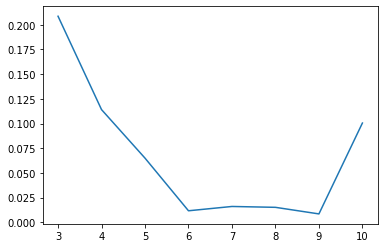

In [4]:
import matplotlib.pyplot as plt

plt.plot(sizelist, inflist)

In [2]:
1+1

2

In [6]:
import pyqram
import random
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
# pyqram.close_profiler()
pyqram.init_profiler()


n_trials = 1
noise = 0.01
size = 3

qram = pyqram.QRAM_bb(size)

fid_list = list()

qram.set_memory_random()
qram.add_noise_model(pyqram.OperationType.BitFlip, noise)

for i in range(0, n_trials):
    # qram.set_seed(random.randint(0,10000))
    qram.set_seed(8626)
    #qram.set_address_sample(100)
    qram.set_address_full()
    qram.run()
    qram.state_view_preparation()
    print(qram.get_state_tree_view())
    print(qram.state_view_to_string())
    print(f"fidelity={qram.get_fidelity()}")
    
    
print(pyqram.get_all_profiles_v2())

{0: A: |0> D: |1>
1: A: |1> D: |1> 2: A: |1> D: |1> 
3: A: |0> D: |0> 4: A: |0> D: |0> 5: A: |0> D: |0> 6: A: |0> D: |1> 
, 0: A: |0> D: |1>
1: A: |0> D: |1> 2: A: |1> D: |0> 
3: A: |0> D: |0> 4: A: |0> D: |0> 5: A: |0> D: |0> 6: A: |0> D: |1> 
, 0: A: |1> D: |1>
1: A: |0> D: |0> 2: A: |1> D: |0> 
3: A: |0> D: |0> 4: A: |0> D: |0> 5: A: |0> D: |0> 6: A: |0> D: |1> 
, 0: A: |1> D: |1>
1: A: |0> D: |1> 2: A: |1> D: |1> 
3: A: |0> D: |0> 4: A: |0> D: |0> 5: A: |0> D: |0> 6: A: |0> D: |1> 
, 0: A: |1> D: |1>
1: A: |1> D: |0> 2: A: |1> D: |1> 
3: A: |0> D: |0> 4: A: |0> D: |0> 5: A: |0> D: |0> 6: A: |0> D: |1> 
, 0: A: |1> D: |1>
1: A: |0> D: |0> 2: A: |0> D: |1> 
3: A: |0> D: |0> 4: A: |0> D: |0> 5: A: |0> D: |0> 6: A: |0> D: |1> 
, 0: A: |0> D: |1>
1: A: |0> D: |0> 2: A: |0> D: |0> 
3: A: |0> D: |0> 4: A: |0> D: |0> 5: A: |0> D: |0> 6: A: |0> D: |1> 
}
Number of Tree Classes: 7
p=0.12499999999999997 nbranch=1
p=0.24999999999999994 nbranch=2
p=0.12499999999999997 nbranch=1
p=0.124999999999

In [1]:
filename = '../build/bin/test.out'
with open(filename, 'r') as fp:
    m = fp.read()
    print(m)

2021-11-18 15:33:56----------------------------
Number of Tree Classes: 4
p=0.24999999999999994 nbranch=2
p=0.24999999999999994 nbranch=2
p=0.24999999999999994 nbranch=2
p=0.24999999999999994 nbranch=2

----------------------------
time : 2.075732 ms

